In [19]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,RepeatVector,Dropout
from keras.layers import Flatten
# from tensorflow.keras.layers import Conv1D
# from tensorflow.keras.layers import MaxPooling1D
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


<h2>SCNN-LUCAS</h2>
<h4>(Simple Exponential Smoothing kết hợp CNN với số lớp Fully Connected layer là số Lucas)</h4>

In [20]:
import h5py

from keras.models import load_model

model_SCNN_Lucas = load_model('SCNN.h5')


with h5py.File("SCNN_data.h5", "r") as file:

    y_test_SCNN_Lucas = file["y_test"][:]
    X_test_SCNN_Lucas = file["X_test"][:]
    time_SCNN_Lucas = file["training_time"][()]
    alpha = file["alpha"][()]
    S = file["S"][:]
    dataScale = file["dataScale"][:]

In [21]:
model_SCNN_Lucas.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 32)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

C:\Users\doank\AppData\Local\Temp\ipykernel_18528\727154278.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataScale, ax=axs[0], color='y')
C:\Users\doank\AppData\Local\Temp\ipykernel_18528\727154278.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(S, ax=axs[1])


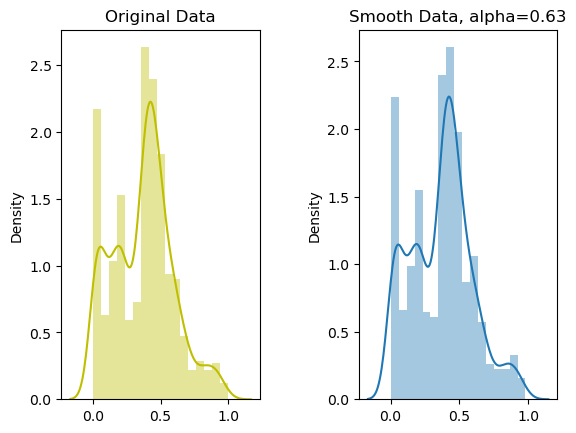

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2)

sns.distplot(dataScale, ax=axs[0], color='y')
axs[0].set_title("Original Data")

sns.distplot(S, ax=axs[1])
axs[1].set_title("Smooth Data" + ", alpha=" + "{:.2f}".format(alpha % 1))


fig.subplots_adjust(wspace=0.5) 

plt.show()


In [23]:
y_pred_SCNN_Lucas = model_SCNN_Lucas.predict(X_test_SCNN_Lucas)
y_pred_SCNN_Lucas = np.reshape(y_pred_SCNN_Lucas, (-1, 1))
mse_SCNN_Lucas = mean_squared_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)
rmse_SCNN_Lucas = np.sqrt(mse_SCNN_Lucas)
mape_SCNN_Lucas = mean_absolute_percentage_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)
mae_SCNN_Lucas = mean_absolute_error(y_test_SCNN_Lucas, y_pred_SCNN_Lucas)

print('MSE: ', mse_SCNN_Lucas)
print('RMSE: ', rmse_SCNN_Lucas)
print('MAPE: ', mape_SCNN_Lucas)
print('MAE: ', mae_SCNN_Lucas)
print('Time: ', time_SCNN_Lucas)

10/10 [==============================] - 2s 1ms/step
MSE:  0.0013391902299780092
RMSE:  0.03659494814831699
MAPE:  0.07499422254126249
MAE:  0.02985614076450121
Time:  255.16199326515198


<h2>LSTM</h2>

In [24]:
import h5py
from keras.models import load_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

# Load model từ file H5
model_LSTM = load_model('LSTM.h5')

# Đọc file H5
with h5py.File('LSTM_data.h5', 'r') as f:
    # Lấy giá trị y_test
    y_test_LSTM = f['y_test'][:]
    
    # Lấy giá trị X_test
    X_test_LSTM = f['X_test'][:]
    
    # Lấy giá trị training_time
    time_LSTM = f['training_time'][()]


In [25]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
y_pred_LSTM = model_LSTM.predict(X_test_LSTM)
y_pred_LSTM = np.reshape(y_pred_LSTM, (-1, 1))
mse_LSTM = mean_squared_error(y_test_LSTM, y_pred_LSTM)
rmse_LSTM = np.sqrt(mse_LSTM)
mape_LSTM = mean_absolute_percentage_error(y_test_LSTM, y_pred_LSTM)
mae_LSTM = mean_absolute_error(y_test_LSTM, y_pred_LSTM)

print('MSE: ', mse_LSTM)
print('RMSE: ', rmse_LSTM)
print('MAPE: ', mape_LSTM)
print('MAE: ', mae_LSTM)
print('Time: ', time_LSTM)

10/10 [==============================] - 1s 2ms/step
MSE:  0.0034515234692625396
RMSE:  0.0587496678225719
MAPE:  0.10350881328835329
MAE:  0.04719433634972769
Time:  682.850058555603


<h2>Summary </h2>

In [35]:
from tabulate import tabulate

# Assume you have the following lists
models = ["S-CNN-Lucas", "LSTM"]
mse_values = [mse_SCNN_Lucas, mse_LSTM]
rmse_values = [rmse_SCNN_Lucas, rmse_LSTM]
mape_values = [mape_SCNN_Lucas, mape_LSTM]
mae_values = [mae_SCNN_Lucas, mae_LSTM]
time_values = [time_SCNN_Lucas, time_LSTM]

# Create a table
table = [["MoHinh", "MSE", "RMSE", "MAPE", "MAE", "TIME"]]

# Append values to the table
for i in range(len(models)):
    table.append([models[i], mse_values[i], rmse_values[i], mape_values[i], mae_values[i], time_values[i]])

In [36]:
title_table = "<h3 style='text-align: center; color: green;'>Bảng tổng kết MSE, RMSE, MAPE , TIME của S-CNN, S-CNN-LUCAS, LSTM</h3>"

display(HTML(title_table))

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤════════════╤═══════════╤═══════════╤═══════════╤═════════╕
│ MoHinh      │        MSE │      RMSE │      MAPE │       MAE │    TIME │
╞═════════════╪════════════╪═══════════╪═══════════╪═══════════╪═════════╡
│ S-CNN-Lucas │ 0.00133919 │ 0.0365949 │ 0.0749942 │ 0.0298561 │ 255.162 │
├─────────────┼────────────┼───────────┼───────────┼───────────┼─────────┤
│ LSTM        │ 0.00345152 │ 0.0587497 │ 0.103509  │ 0.0471943 │ 682.85  │
╘═════════════╧════════════╧═══════════╧═══════════╧═══════════╧═════════╛


<h2>Recommend</h2>

In [47]:

# Function to determine the best model based on criteria
def determine_best_model(model1, model2):
    # You can define your own criteria for comparison
    # For example, you might prefer lower values for MSE, RMSE, MAE, MAPE, and lower time
    criteria1 = model1[1] + model1[2] + model1[3] + model1[4] + model1[5]
    criteria2 = model2[1] + model2[2] + model2[3] + model2[4] + model2[5]
    
    if criteria1 < criteria2:
        return model1[0]
    elif criteria2 < criteria1:
        return model2[0]
    else:
        return "No"

# Compare models
best_model = determine_best_model(table[1], table[2])

# Print the table and the best model
for row in table:
    print(row)


['MoHinh', 'MSE', 'RMSE', 'MAPE', 'MAE', 'TIME']
['S-CNN-Lucas', 0.0013391902299780092, 0.03659494814831699, 0.07499422254126249, 0.02985614076450121, 255.16199326515198]
['LSTM', 0.0034515234692625396, 0.0587496678225719, 0.10350881328835329, 0.04719433634972769, 682.850058555603]


In [59]:
if best_model=='S-CNN-Lucas':
     price_recommend= y_pred_SCNN_Lucas[-1][0]
elif best_model=='LSTM':
     price_recommend= y_pred_LSTM[-1][0]
print('Price recommend:',round(price_recommend*100,4))

Price recommend: 48.718
